# Sentiment Analysis of Reddit Posts

In [1]:
!pip install nltk

In [10]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
sia = SentimentIntensityAnalyzer()

In [4]:
def get_sentiment(text):
    # Get sentiment score using VADER
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # compound score ranges from -1 (negative) to 1 (positive)

# Add sentiment category (positive scores are classified as Positive post, negative scores are classified as Negative post)
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

### Add Sentiment Analysis to Training Data

In [5]:
train_reddit_data = pd.read_csv('data/train_reddit_df_w_text.csv')

In [6]:
train_reddit_data.head()

,Post_Title,Post_URL,Post_Text,Date_Posted,Upvotes,Comments,Subreddit
0,Intel's revenue forecast disappoints as invest...,https://www.reddit.com/r/stocks/comments/1idxs...,"Intel's (INTC.O), opens new tab first-quarter ...",2025-01-30 21:17:18,238,79,stocks
1,Nvidia’s Prime time to buy,https://www.reddit.com/r/stocks/comments/1idqh...,\nStocks are emotional in nature. The Nvidia i...,2025-01-30 16:12:44,9,42,stocks
2,These are the stocks on my watchlist (01/30),https://www.reddit.com/r/stocks/comments/1ido0...,This is a daily watchlist for short-term tradi...,2025-01-30 14:20:34,25,15,stocks
3,1/30) - Thursday's Pre-Market News & Stock Movers,https://www.reddit.com/r/stocks/comments/1idni...,#Good morning traders and investors of the r/s...,2025-01-30 13:57:10,11,2,stocks
4,Meta's CAPEX Spending Exceeds the Combined Net...,https://www.reddit.com/r/stocks/comments/1id9r...,**META** plans to spend **$60-$65 billion** in...,2025-01-30 00:50:17,239,87,stocks


In [7]:
# Apply sentiment analysis score and category to df
train_reddit_data['Post_Text'] = train_reddit_data['Post_Text'].astype(str)
train_reddit_data['Sentiment'] = train_reddit_data['Post_Text'].apply(get_sentiment)
train_reddit_data['Sentiment Category'] = train_reddit_data['Sentiment'].apply(categorize_sentiment)

train_reddit_data.head()

,Post_Title,Post_URL,Post_Text,Date_Posted,Upvotes,Comments,Subreddit,Sentiment,Sentiment Category
0,Intel's revenue forecast disappoints as invest...,https://www.reddit.com/r/stocks/comments/1idxs...,"Intel's (INTC.O), opens new tab first-quarter ...",2025-01-30 21:17:18,238,79,stocks,-0.5106,Negative
1,Nvidia’s Prime time to buy,https://www.reddit.com/r/stocks/comments/1idqh...,\nStocks are emotional in nature. The Nvidia i...,2025-01-30 16:12:44,9,42,stocks,0.9874,Positive
2,These are the stocks on my watchlist (01/30),https://www.reddit.com/r/stocks/comments/1ido0...,This is a daily watchlist for short-term tradi...,2025-01-30 14:20:34,25,15,stocks,0.8167,Positive
3,1/30) - Thursday's Pre-Market News & Stock Movers,https://www.reddit.com/r/stocks/comments/1idni...,#Good morning traders and investors of the r/s...,2025-01-30 13:57:10,11,2,stocks,0.9979,Positive
4,Meta's CAPEX Spending Exceeds the Combined Net...,https://www.reddit.com/r/stocks/comments/1id9r...,**META** plans to spend **$60-$65 billion** in...,2025-01-30 00:50:17,239,87,stocks,0.4574,Positive


In [8]:
train_reddit_data[train_reddit_data['Sentiment Category'] != 'Neutral']

,Post_Title,Post_URL,Post_Text,Date_Posted,Upvotes,Comments,Subreddit,Sentiment,Sentiment Category
0,Intel's revenue forecast disappoints as invest...,https://www.reddit.com/r/stocks/comments/1idxs...,"Intel's (INTC.O), opens new tab first-quarter ...",2025-01-30 21:17:18,238,79,stocks,-0.5106,Negative
1,Nvidia’s Prime time to buy,https://www.reddit.com/r/stocks/comments/1idqh...,\nStocks are emotional in nature. The Nvidia i...,2025-01-30 16:12:44,9,42,stocks,0.9874,Positive
2,These are the stocks on my watchlist (01/30),https://www.reddit.com/r/stocks/comments/1ido0...,This is a daily watchlist for short-term tradi...,2025-01-30 14:20:34,25,15,stocks,0.8167,Positive
3,1/30) - Thursday's Pre-Market News & Stock Movers,https://www.reddit.com/r/stocks/comments/1idni...,#Good morning traders and investors of the r/s...,2025-01-30 13:57:10,11,2,stocks,0.9979,Positive
4,Meta's CAPEX Spending Exceeds the Combined Net...,https://www.reddit.com/r/stocks/comments/1id9r...,**META** plans to spend **$60-$65 billion** in...,2025-01-30 00:50:17,239,87,stocks,0.4574,Positive
...,...,...,...,...,...,...,...,...,...
442,Nvidia (NVDA) March 25/ 151 call options,https://i.redd.it/f5wihizyvh3e1.jpeg,"So NVDA beat top and bottom lines on earnings,...",2024-11-27 19:23:25,10,23,wallstreetbets,-0.5000,Negative
443,Any hopes for a Santa rally or I am getting rekt?,https://i.redd.it/ga5axymdvg3e1.png,Thought I was a genius and yoloed my last 20k ...,2024-11-27 15:58:18,97,104,wallstreetbets,0.3612,Positive
444,$Dell Earnings,https://www.reddit.com/r/wallstreetbets/commen...,I wanted to get everyone’s take on DELL (down ...,2024-11-26 23:28:30,2,28,wallstreetbets,0.9803,Positive
445,dell earnings are going to be good,https://www.reddit.com/r/wallstreetbets/commen...,Dell Technologies' upcoming earnings report co...,2024-11-26 20:16:23,0,41,wallstreetbets,0.9129,Positive


In [9]:
train_reddit_data.to_csv('data/train_reddit_df_sentiment_w_text.csv', index=False)

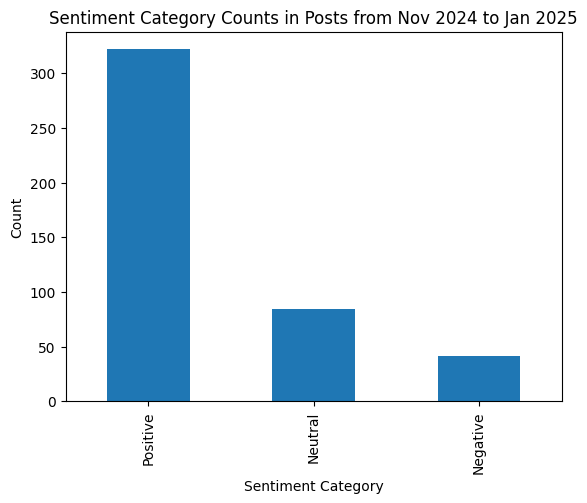

<Figure size 640x480 with 0 Axes>

In [16]:
category_counts = train_reddit_data['Sentiment Category'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Category Counts in Posts from Nov 2024 to Jan 2025')
plt.show()
plt.savefig('sentiment_category_counts.png')

### Add Sentiment Analysis to Test Data

In [18]:
test_reddit_data = pd.read_csv('data/test_reddit_df_w_text.csv')

In [19]:
test_reddit_data.head()

,Post_Title,Post_URL,Post_Text,Date_Posted,Upvotes,Comments,Subreddit
0,Why did DeepSeek cause NVIDIA to drop? Doesn’t...,https://www.reddit.com/r/stocks/comments/1ijbs...,Doesn’t it use NVIDIA to train their LLMs as w...,2025-02-06 19:59:32,0,23,stocks
1,"SMCI - Road to Redemption, or The Final Blow?",https://www.reddit.com/r/stocks/comments/1ij45...,We are approaching what could be one of the la...,2025-02-06 14:45:18,36,67,stocks
2,These are the stocks on my watchlist (02/6),https://www.reddit.com/r/stocks/comments/1ij3k...,This is a daily watchlist for short-term tradi...,2025-02-06 14:18:22,52,16,stocks
3,Thinking about NVDA beyond 2025 Hyperscaler Ca...,https://www.reddit.com/r/stocks/comments/1iihl...,With 3/4 hyperscalers reporting earnings alrea...,2025-02-05 18:54:07,63,34,stocks
4,Big tech CapEx: 2024 vs. 2025 and increase in ...,https://www.reddit.com/r/stocks/comments/1ihzo...,\nAI infrastructure spending is accelerating f...,2025-02-05 02:29:16,41,14,stocks


In [20]:
# Get a sentiment analysis score and category
test_reddit_data['Sentiment'] = test_reddit_data['Post_Title'].apply(get_sentiment)

test_reddit_data['Sentiment Category'] = test_reddit_data['Sentiment'].apply(categorize_sentiment)

test_reddit_data.head()

,Post_Title,Post_URL,Post_Text,Date_Posted,Upvotes,Comments,Subreddit,Sentiment,Sentiment Category
0,Why did DeepSeek cause NVIDIA to drop? Doesn’t...,https://www.reddit.com/r/stocks/comments/1ijbs...,Doesn’t it use NVIDIA to train their LLMs as w...,2025-02-06 19:59:32,0,23,stocks,-0.3527,Negative
1,"SMCI - Road to Redemption, or The Final Blow?",https://www.reddit.com/r/stocks/comments/1ij45...,We are approaching what could be one of the la...,2025-02-06 14:45:18,36,67,stocks,0.0000,Neutral
2,These are the stocks on my watchlist (02/6),https://www.reddit.com/r/stocks/comments/1ij3k...,This is a daily watchlist for short-term tradi...,2025-02-06 14:18:22,52,16,stocks,0.0000,Neutral
3,Thinking about NVDA beyond 2025 Hyperscaler Ca...,https://www.reddit.com/r/stocks/comments/1iihl...,With 3/4 hyperscalers reporting earnings alrea...,2025-02-05 18:54:07,63,34,stocks,0.3818,Positive
4,Big tech CapEx: 2024 vs. 2025 and increase in ...,https://www.reddit.com/r/stocks/comments/1ihzo...,\nAI infrastructure spending is accelerating f...,2025-02-05 02:29:16,41,14,stocks,0.2023,Positive


In [21]:
test_reddit_data[test_reddit_data['Sentiment Category'] != 'Neutral']

,Post_Title,Post_URL,Post_Text,Date_Posted,Upvotes,Comments,Subreddit,Sentiment,Sentiment Category
0,Why did DeepSeek cause NVIDIA to drop? Doesn’t...,https://www.reddit.com/r/stocks/comments/1ijbs...,Doesn’t it use NVIDIA to train their LLMs as w...,2025-02-06 19:59:32,0,23,stocks,-0.3527,Negative
3,Thinking about NVDA beyond 2025 Hyperscaler Ca...,https://www.reddit.com/r/stocks/comments/1iihl...,With 3/4 hyperscalers reporting earnings alrea...,2025-02-05 18:54:07,63,34,stocks,0.3818,Positive
4,Big tech CapEx: 2024 vs. 2025 and increase in ...,https://www.reddit.com/r/stocks/comments/1ihzo...,\nAI infrastructure spending is accelerating f...,2025-02-05 02:29:16,41,14,stocks,0.2023,Positive
5,"AMD reports profit beat, but misses on data ce...",https://www.reddit.com/r/stocks/comments/1ihve...,Advanced Micro Devices reported fourth-quarter...,2025-02-04 23:07:55,530,213,stocks,-0.1027,Negative
10,Can we trust chatgpt to calculate stock values?,https://www.reddit.com/r/investing/comments/1i...,It's telling me Palantir is worth $3.76 per sh...,2025-02-04 19:48:24,0,38,investing,0.7184,Positive
12,NVDA: DeepSeek’s Disruption and the Changing T...,https://www.reddit.com/r/investing/comments/1i...,* Nvidia’s AI Market Dominance – Nvidia’s H100...,2025-02-03 02:17:01,0,3,investing,-0.3612,Negative
14,Trading with profits every day. What's wrong w...,https://www.reddit.com/r/Daytrading/comments/1...,"Hi everyone, \nI'm new to day trading but I've...",2025-02-05 08:34:16,1,3,Daytrading,-0.0516,Negative
16,I'm a full time trader and this is everything ...,https://www.reddit.com/r/Daytrading/comments/1...,MACRO NEWS:\n\n* Australia retail sales came i...,2025-02-03 13:20:24,2,0,Daytrading,0.2732,Positive
17,Any Advice Please guys?,https://www.reddit.com/r/Daytrading/comments/1...,"Hey guys,\n\nI’ve been paper trading Tesla opt...",2025-02-03 02:52:20,1,0,Daytrading,0.3182,Positive
19,My first month of trading options (as a seriou...,https://i.redd.it/gorzf9bpgfge1.jpeg,\nI have dabbled in trading options contracts ...,2025-02-01 01:08:00,216,47,Daytrading,-0.0772,Negative


In [22]:
test_reddit_data.to_csv('data/test_reddit_df_sentiment.csv', index=False)

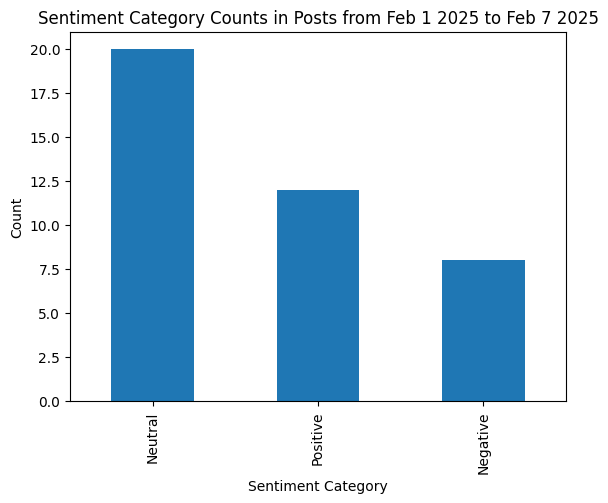

<Figure size 640x480 with 0 Axes>

In [24]:
category_counts = test_reddit_data['Sentiment Category'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Category Counts in Posts from Feb 1 2025 to Feb 7 2025')
plt.show()
plt.savefig('sentiment_category_counts.png')